## NTS Wires


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('../csv/8.12.24_12.05.24_no_outlier.csv')

# Function to convert hex to decimal
def hex_to_decimal(hex_value):
    if isinstance(hex_value, str):  # Ensure the value is a string
        try:
            decimal_value = int(hex_value, 16)
            return decimal_value
        except ValueError: 
            return None
    return None  

# Apply the conversion to the ADC Threshold column
df['ADC Threshold (V)'] = df['ADC Threshold'].apply(hex_to_decimal)


quad_color_palette = {
    'Pink': '#FF69B4',  
    'White': '#808080',  
    'Brown': '#8B4513'  
}

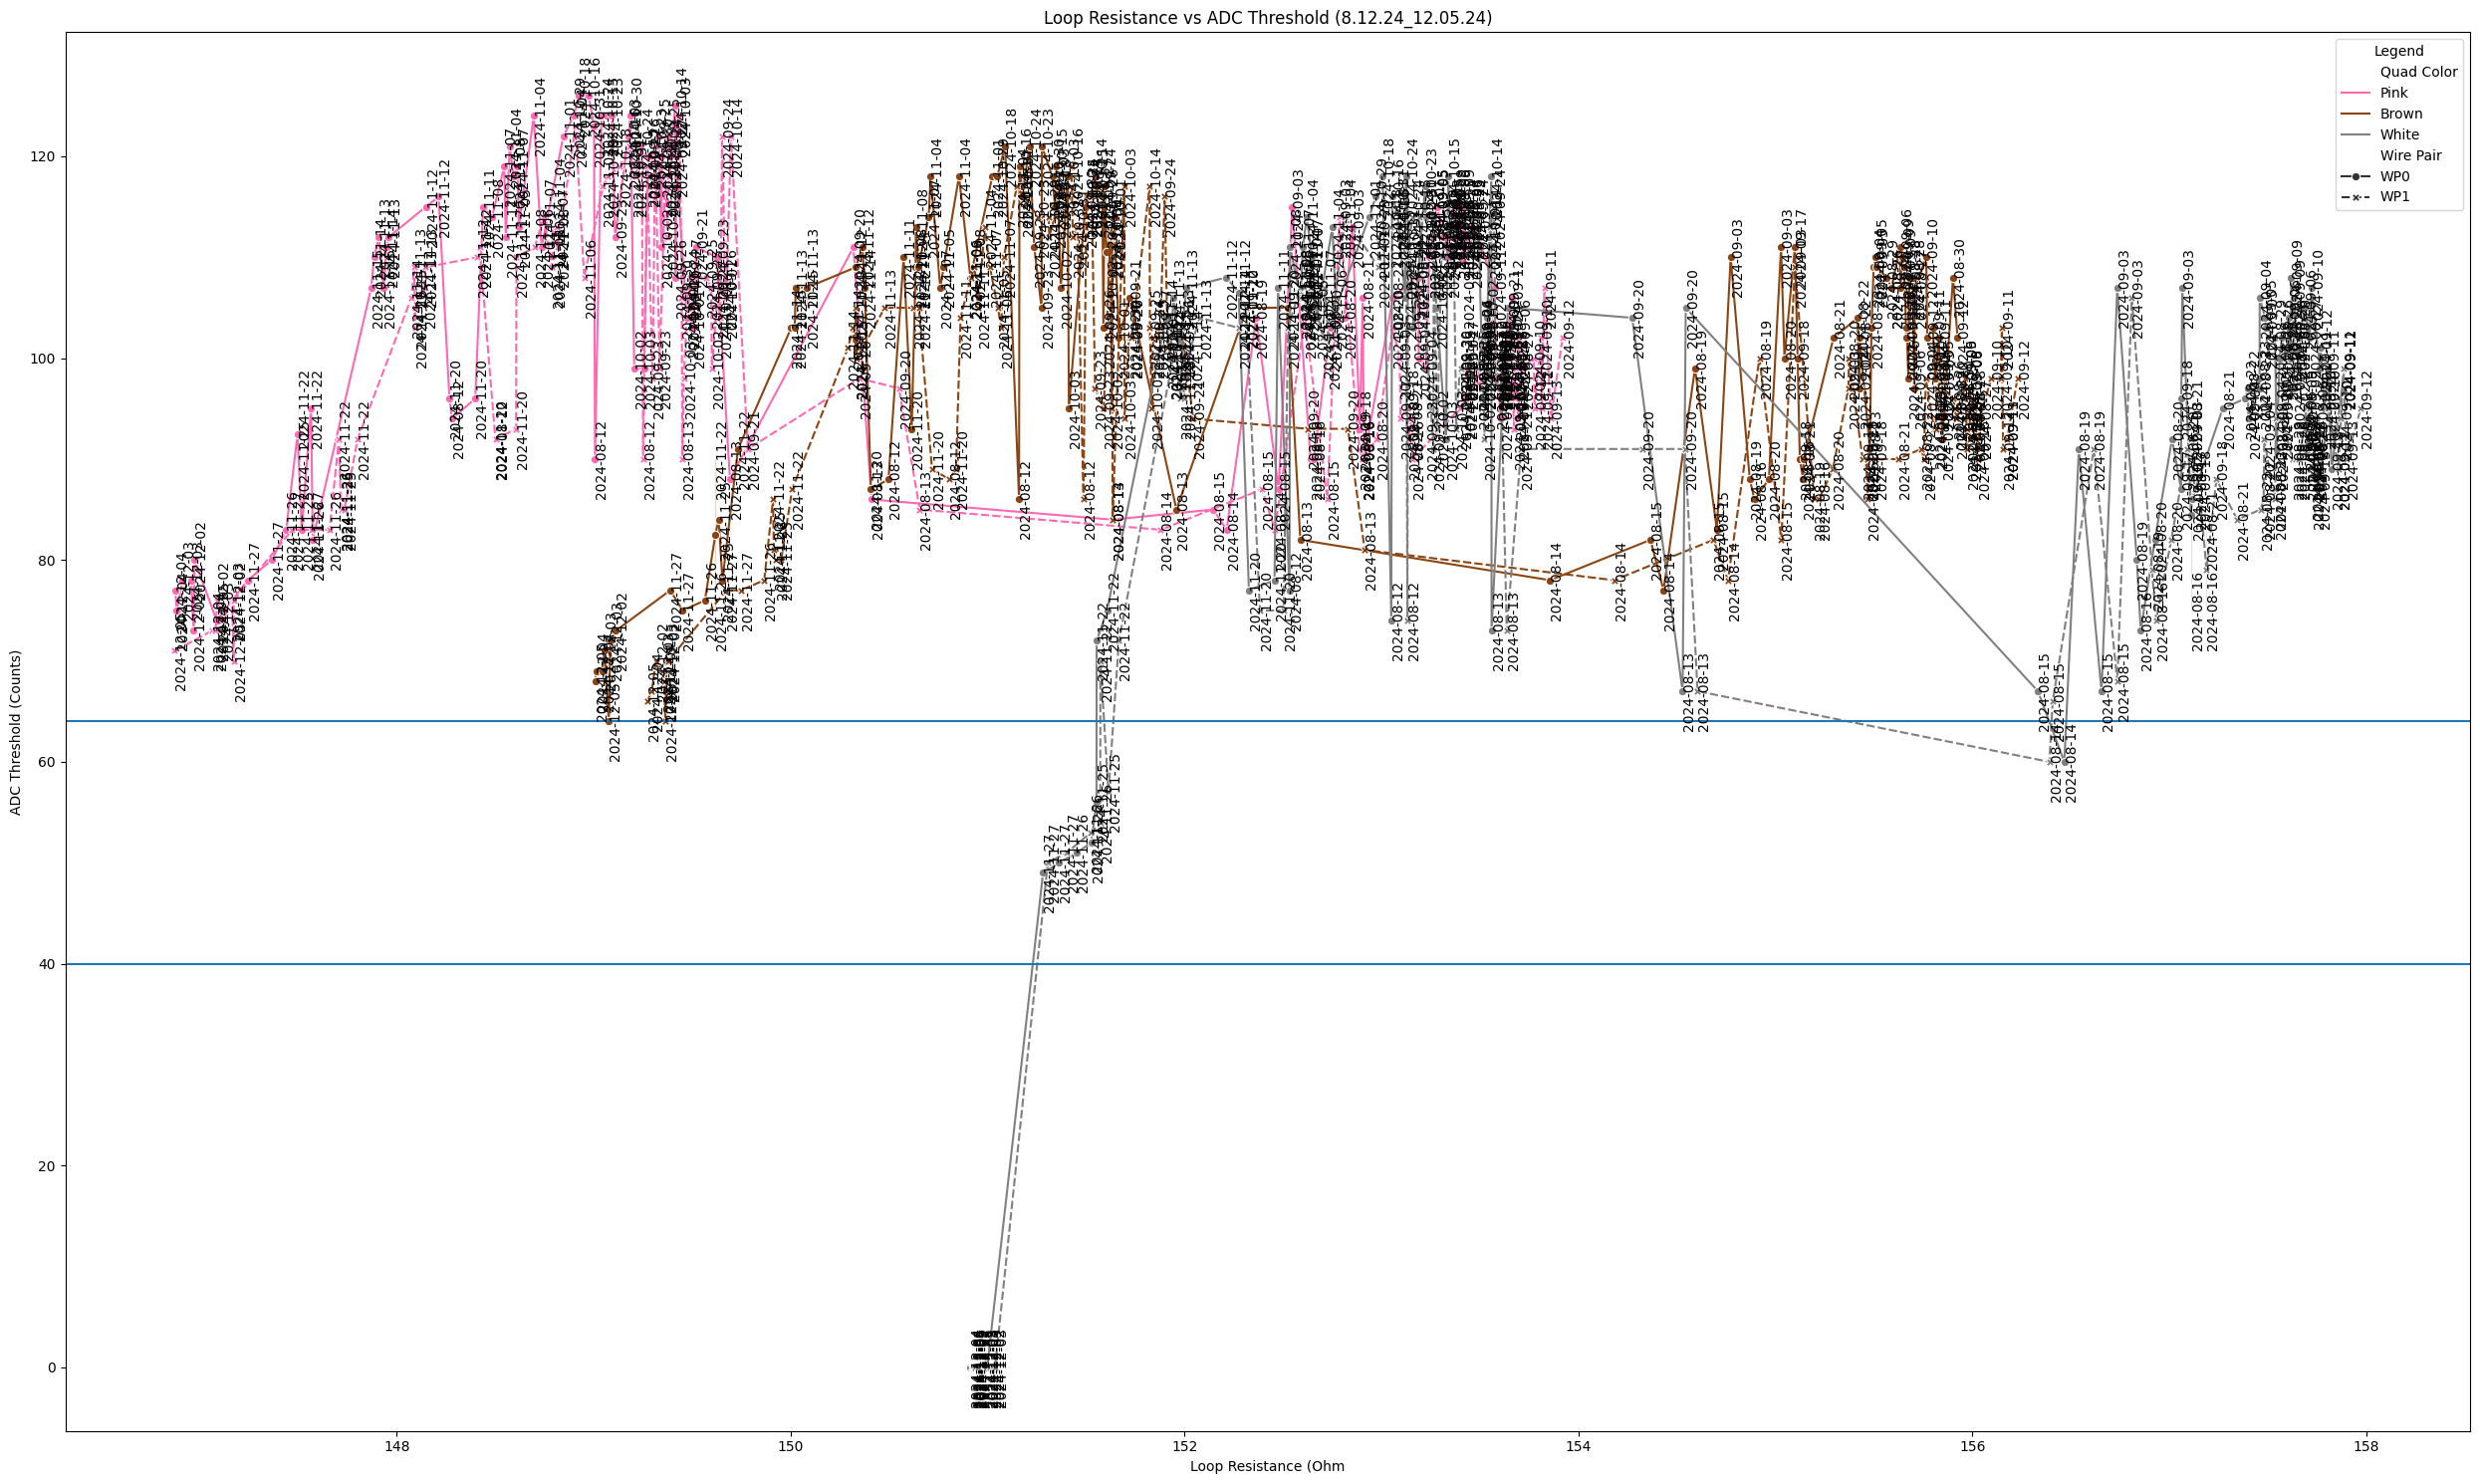

In [27]:
# Drop rows where Loop Resistance or ADC Threshold is NaN
df = df.dropna(subset=['Loop Resistance [kohms]', 'ADC Threshold (V)'])
df['Loop Resistance (Ohm)'] = df['Loop Resistance [kohms]'] * 1000
df['Time'] = df['Time'].str.replace(' PM', '', regex=False)# Remove 'PM' if present
df['Time'] = df['Time'].str.replace(' AM', '', regex=False) 
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')  # Convert to datetime

# Drop rows with invalid Time values
df = df.dropna(subset=['Time'])



plt.figure(figsize=(25, 15))



# Plot Loop Resistance vs ADC Threshold for each Quad Color
sns.lineplot(data=df, 
             x='Loop Resistance (Ohm)',
             y='ADC Threshold (V)', 
             hue='Quad Color',
             style='Wire Pair', 
             palette=quad_color_palette,
             markers = True
            )
for i, row in df.iterrows():
    plt.text(row['Loop Resistance (Ohm)'], row['ADC Threshold (V)'], row['Time'].strftime('%Y-%m-%d'), rotation=90,
             verticalalignment='center')

plt.title('Loop Resistance vs ADC Threshold (8.12.24_12.05.24)')
plt.xlabel('Loop Resistance (Ohm')
plt.ylabel('ADC Threshold (Counts)')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Legend', loc='best')
plt.axhline(y=64)
plt.axhline(y=40)
plt.tight_layout()
plt.show()

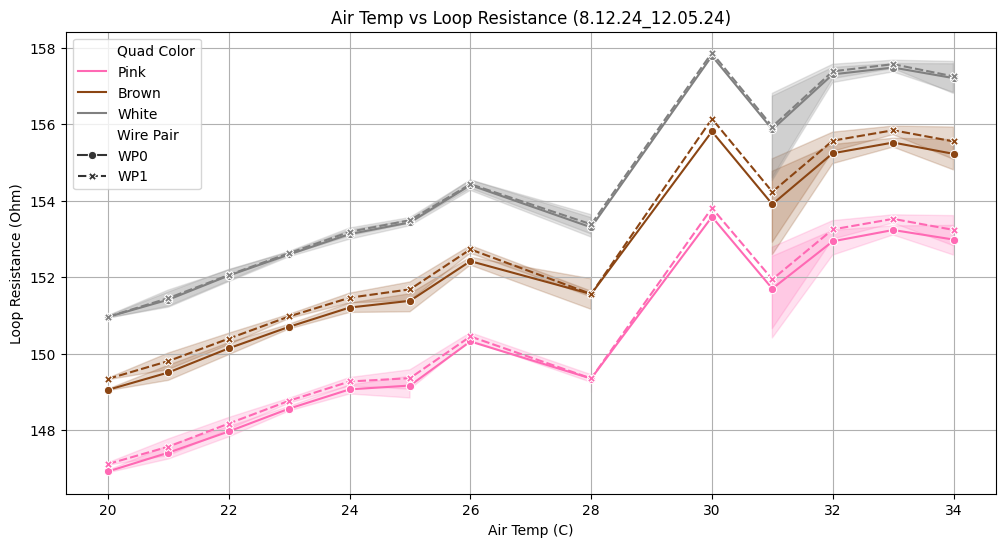

In [28]:
plt.figure(figsize=(12, 6))
plt.grid(True)
sns.lineplot(data=df, x='Temp [C]', y='Loop Resistance (Ohm)', hue='Quad Color', style='Wire Pair',  markers=True, palette=quad_color_palette)
plt.title('Air Temp vs Loop Resistance (8.12.24_12.05.24)')
plt.xlabel('Air Temp (C)')
plt.show()

## Wire Temp vs Air Temp over Time

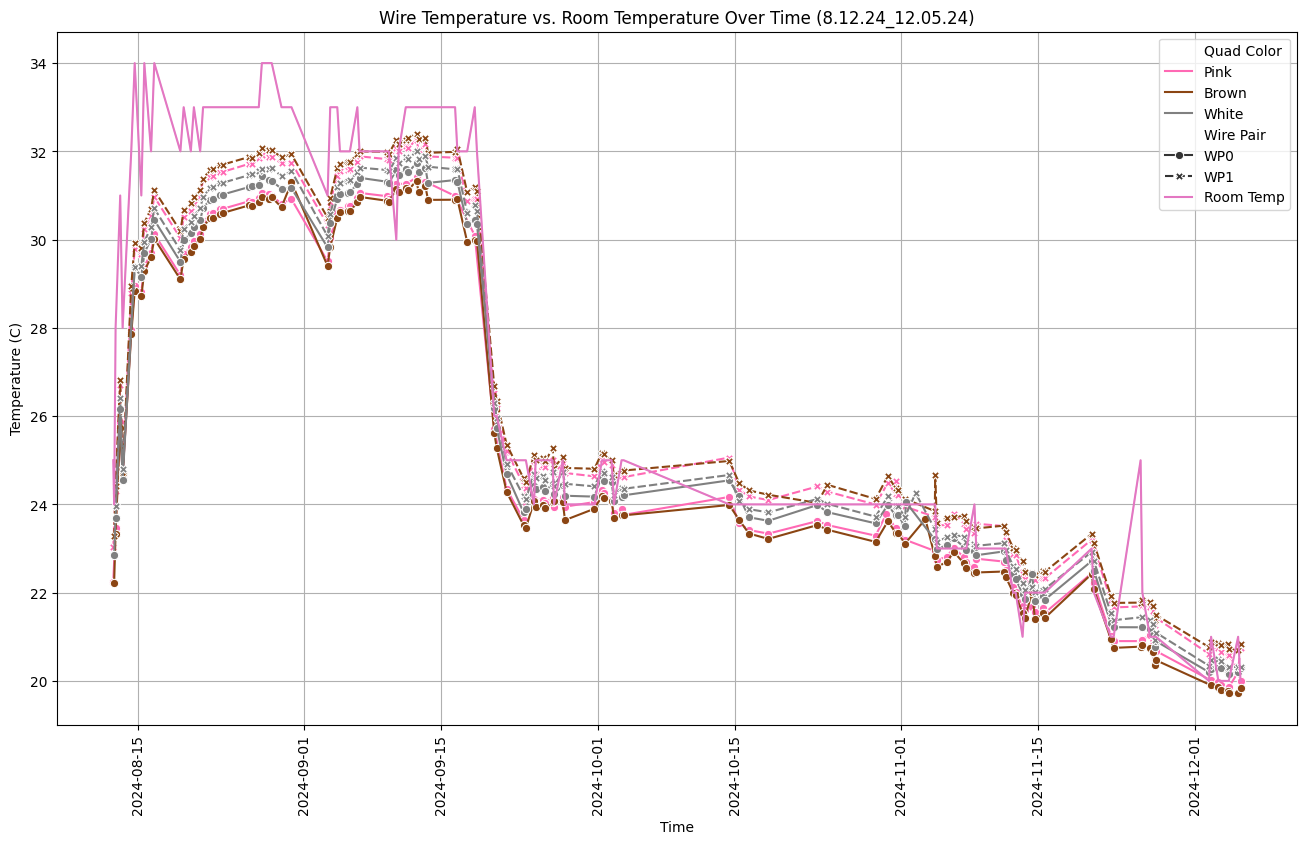

In [29]:
alpha = 0.00393
reference_resistance = {
    ('Pink', 'WP0'): 0.149314,
    ('Pink', 'WP1'): 0.149074,
    ('White', 'WP0'): 0.153229,
    ('White', 'WP1'): 0.153151,
    ('Brown', 'WP0'): 0.151554,
    ('Brown', 'WP1'): 0.151237,
}
initial_room_temp = 24

# Function to calculate wire temperature with conversion from kiloohms to ohms
def calculate_wire_temp(row):
    quad_wire_pair = (row['Quad Color'], row['Wire Pair'])
    R_reference_kohms = reference_resistance.get(quad_wire_pair, None)
    
    if R_reference_kohms is not None:
        R_reference = R_reference_kohms * 1000
        R_measured = row['Loop Resistance [kohms]'] * 1000
        
        delta_T = (R_measured - R_reference) / (R_reference * alpha)
        T_wire = initial_room_temp + delta_T
        return T_wire
    else:
        return None

# Apply function to calculate wire temperature for each row
df['Wire Temp [C]'] = df.apply(calculate_wire_temp, axis=1)


df = df.sort_values(by='Time', ascending=True)



plt.figure(figsize=(16, 9))

# Plot wire temperature
sns.lineplot(x='Time', y='Wire Temp [C]', data=df, hue='Quad Color', style='Wire Pair', palette=quad_color_palette, markers = True)

# Plot room temperature
sns.lineplot(x='Time', y='Temp [C]', data=df, markers=True, label='Room Temp')


plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.title('Wire Temperature vs. Room Temperature Over Time (8.12.24_12.05.24)')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()


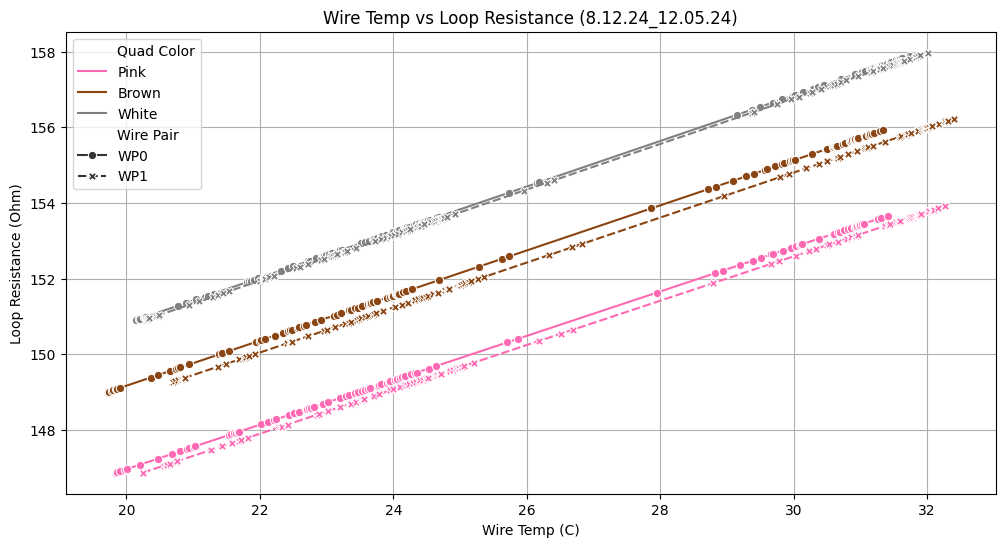

In [30]:
plt.figure(figsize=(12, 6))
plt.grid(True)
sns.lineplot(data=df, x='Wire Temp [C]', y='Loop Resistance (Ohm)', hue='Quad Color', style='Wire Pair',  markers=True, palette=quad_color_palette)
plt.title('Wire Temp vs Loop Resistance (8.12.24_12.05.24)')
plt.xlabel('Wire Temp (C)')
plt.show()



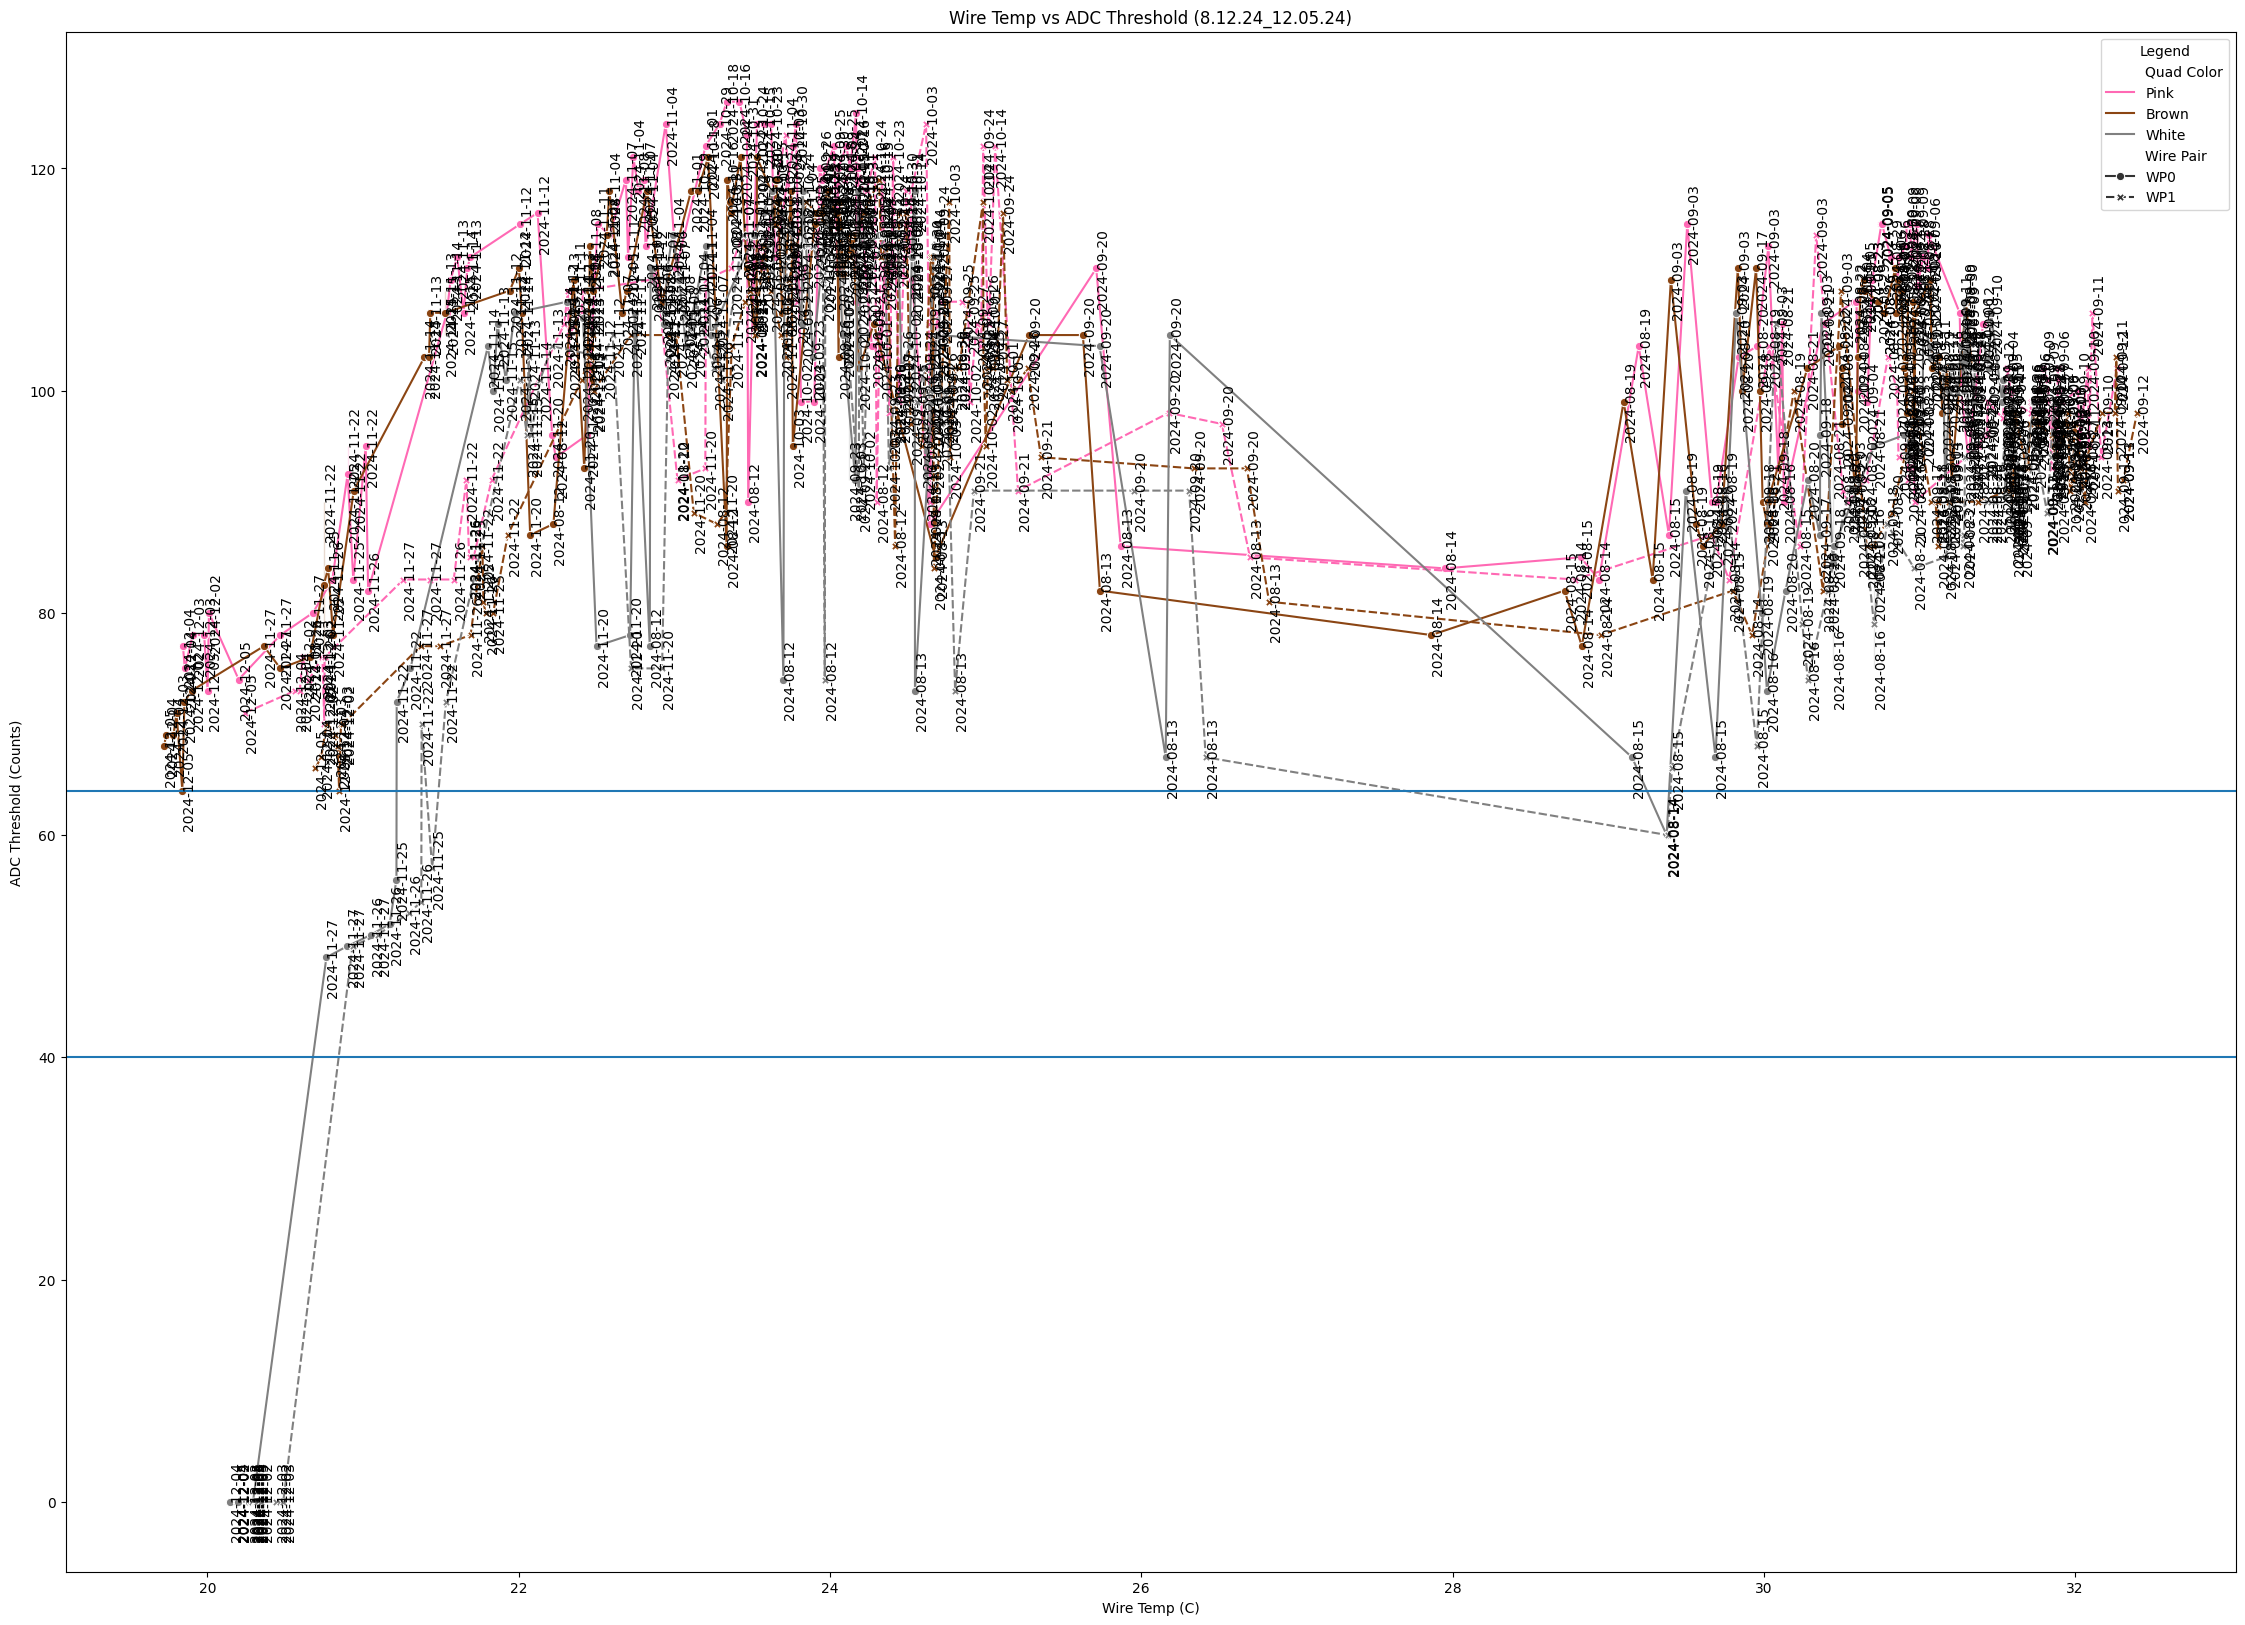

In [31]:
plt.figure(figsize=(28, 20))
sns.lineplot(data=df, 
             x='Wire Temp [C]',
             y='ADC Threshold (V)', 
             hue='Quad Color',
             style='Wire Pair', 
             palette=quad_color_palette,
             markers = True
            )
for i, row in df.iterrows():
    plt.text(row['Wire Temp [C]'], row['ADC Threshold (V)'], row['Time'].strftime('%Y-%m-%d'), rotation=90,
             verticalalignment='center')

plt.title('Wire Temp vs ADC Threshold (8.12.24_12.05.24)')
plt.xlabel('Wire Temp (C)')
plt.ylabel('ADC Threshold (Counts)')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Legend', loc='best')
plt.axhline(y=64)
plt.axhline(y=40)
plt.show()

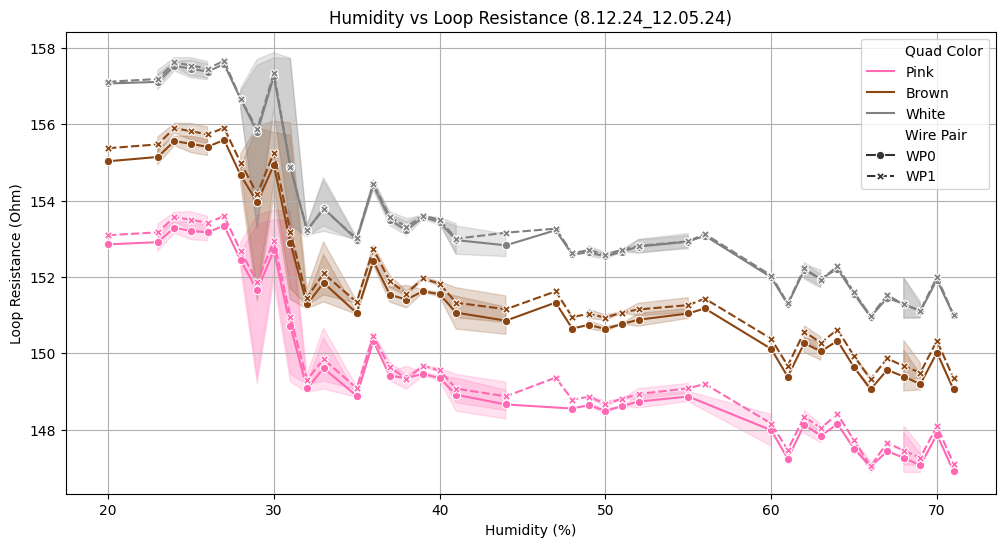

In [32]:
plt.figure(figsize=(12, 6))
plt.grid(True)
sns.lineplot(data=df, x='Humidity ', y='Loop Resistance (Ohm)', hue='Quad Color', style='Wire Pair',  markers=True, palette=quad_color_palette)
plt.title('Humidity vs Loop Resistance (8.12.24_12.05.24)')
plt.xlabel('Humidity (%)')
plt.show()

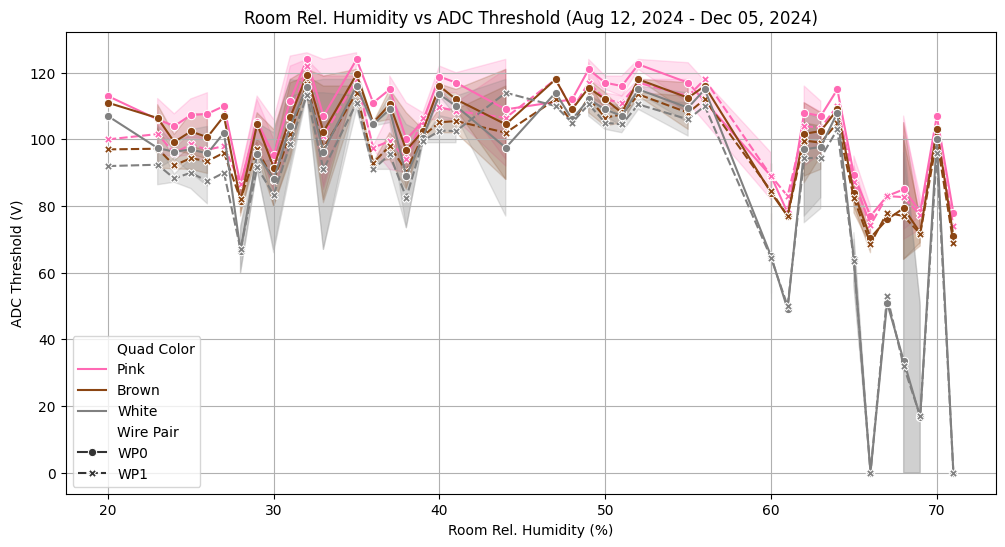

In [36]:
plt.figure(figsize=(12, 6))
plt.grid(True)
# change color of white quad lineplot
sns.lineplot(data=df, x='Humidity ', y='ADC Threshold (V)', hue='Quad Color', style='Wire Pair',  markers=True, palette=quad_color_palette)
plt.title('Room Rel. Humidity vs ADC Threshold (Aug 12, 2024 - Dec 05, 2024)')
plt.xlabel('Room Rel. Humidity (%)')
plt.show()

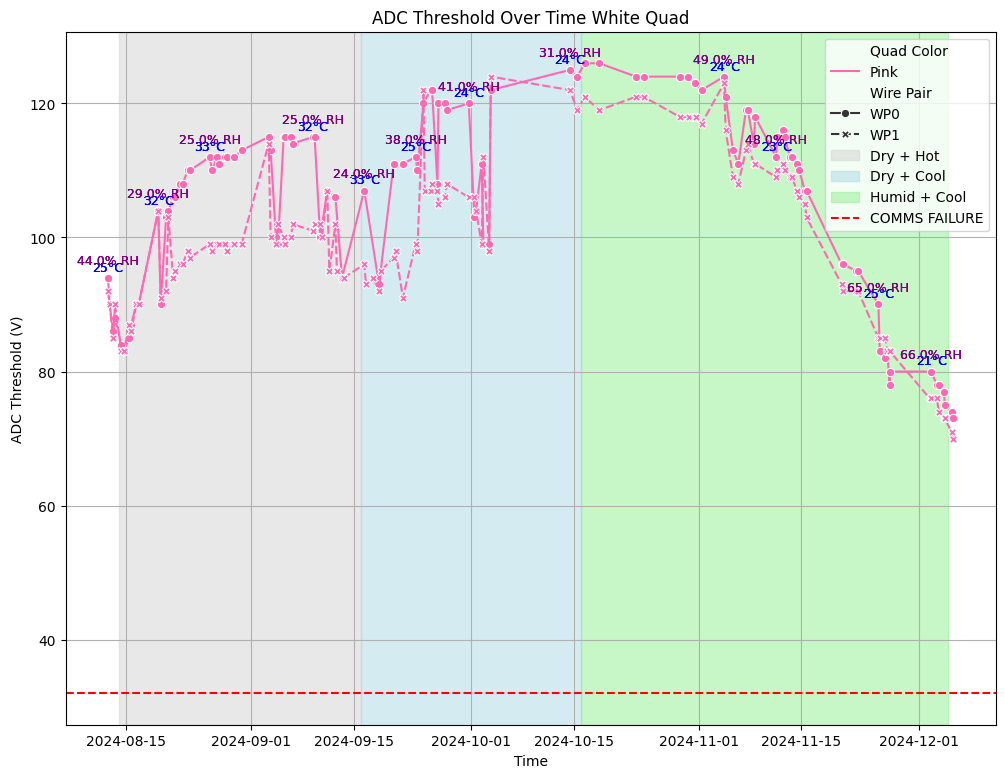

In [82]:
# Define the shading intervals
shade_intervals = [
    {'start': '2024-08-14', 'end': '2024-09-16', 'color': 'lightgrey', 'label': 'Dry + Hot'},
    {'start': '2024-09-16', 'end': '2024-10-16', 'color': 'lightblue', 'label': 'Dry + Cool'},
    {'start': '2024-10-16', 'end': '2024-12-05', 'color': 'lightgreen', 'label': 'Humid + Cool'}
]

plt.figure(figsize=(12, 9))

# Filter the dataframe for the 'White' quad color
df_white = df[df['Quad Color'] == 'White']
df_pink = df[df['Quad Color'] == 'Pink']

# Plot ADC Threshold over time
sns.lineplot(x='Time', y='ADC Threshold (V)', data=df_pink, hue='Quad Color', style='Wire Pair', palette=quad_color_palette, markers=True)

# Shade the plot between certain dates with labels
for interval in shade_intervals:
    plt.axvspan(pd.to_datetime(interval['start']), pd.to_datetime(interval['end']), color=interval['color'], alpha=0.5, label=interval['label'])
    # Add humidity and temperature annotations once a day for WP0
    last_date = None
    for i, row in df_pink.iterrows():
        if row['Wire Pair'] == 'WP0' and row['Wire Pair'] == 'WP0' and row['Time'].weekday() == 0 and row['Time'].isocalendar()[1] and (last_date is None or row['Time'].date() != last_date):
            plt.text(row['Time'], row['ADC Threshold (V)'] + 1, f"{row['Temp [C]']}°C", horizontalalignment='center', fontsize=9, color='blue')
            plt.text(row['Time'], row['ADC Threshold (V)'] + 2, f"{row['Humidity ']}% RH", horizontalalignment='center', fontsize=9, color='purple')
            last_date = row['Time'].date()

# Add labels and title
plt.axhline(y=32, color='red', linestyle='--', label='COMMS FAILURE')
plt.xlabel('Time')
plt.ylabel('ADC Threshold (V)')
plt.title('ADC Threshold Over Time White Quad')
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_731094/4218118375.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Humidity ', y='ADC Threshold (V)', data=df_white, marker='o', palette=quad_color_palette)


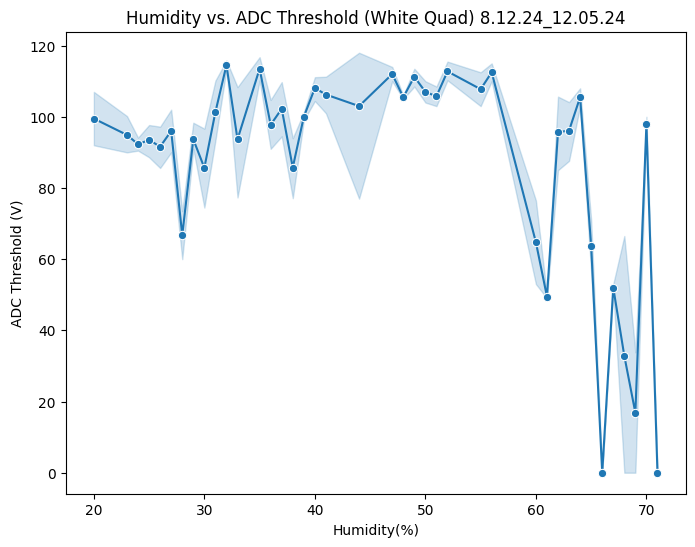

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the 'White' quad color
df_white = df[df['Quad Color'] == 'White']


# Create a scatter plot for Wire Temp vs. ADC Thresholdorange
plt.figure(figsize=(8, 6))

sns.lineplot(x='Humidity ', y='ADC Threshold (V)', data=df_white, marker='o', palette=quad_color_palette)

# Add labels and title
plt.xlabel('Humidity(%)')
plt.ylabel('ADC Threshold (V)')
plt.title('Humidity vs. ADC Threshold (White Quad) 8.12.24_12.05.24')

# Show the plot
plt.show()
